In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
train = pd.read_csv(r'C:\Users\iurig\OneDrive\Estudo ML\Desafio 2\Banco de Dados\train.csv')
test = pd.read_csv(r'C:\Users\iurig\OneDrive\Estudo ML\Desafio 2\Banco de Dados\test.csv')

In [4]:
train

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136424,136424,M22284,M,300.1,311.4,1530,37.5,210,0,0,0,0,0,0
136425,136425,H38017,H,297.5,308.5,1447,49.1,2,0,0,0,0,0,0
136426,136426,L54690,L,300.5,311.8,1524,38.5,214,0,0,0,0,0,0
136427,136427,L53876,L,301.7,310.9,1447,46.3,42,0,0,0,0,0,0


In [5]:
test

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90949,227378,L51130,L,302.3,311.4,1484,40.4,15,0,0,0,0,0
90950,227379,L47783,L,297.9,309.8,1542,33.8,31,0,0,0,0,0
90951,227380,L48097,L,295.6,306.2,1501,41.4,187,0,0,0,0,0
90952,227381,L48969,L,298.1,307.8,1534,40.3,69,0,0,0,0,0


## EDA

In [6]:
train_data = train.copy()

In [7]:
X = train_data.copy()
y = X.pop('Machine failure')

In [8]:
X.describe(include='all')

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
count,136429.000000,136429,136429,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000
unique,NaN,9976,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,L53257,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,139,95354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,68214.000000,NaN,NaN,299.862776,309.941070,1520.331110,40.348643,104.408901,0.001554,0.005160,0.002397,0.003958,0.002258
std,39383.804275,NaN,NaN,1.862247,1.385173,138.736632,8.502229,63.965040,0.039389,0.071649,0.048899,0.062789,0.047461
min,0.000000,NaN,NaN,295.300000,305.800000,1181.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34107.000000,NaN,NaN,298.300000,308.700000,1432.000000,34.600000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,68214.000000,NaN,NaN,300.000000,310.000000,1493.000000,40.400000,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,102321.000000,NaN,NaN,301.200000,310.900000,1580.000000,46.100000,159.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   TWF                      136429 non-null  int64  
 9   HDF                      136429 non-null  int64  
 10  PWF                      136429 non-null  int64  
 11  OSF                      136429 non-null  int64  
 12  RNF                      136429 non-null  int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 13.5+ MB


In [10]:
y.value_counts(normalize=True)

Machine failure
0    0.984256
1    0.015744
Name: proportion, dtype: float64

Our biggest chellange with this dataset will be imbalance in the classes, since the data itself is, for now present, a significantly good quality

In [11]:
X.dtypes

id                           int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object

<AxesSubplot: >

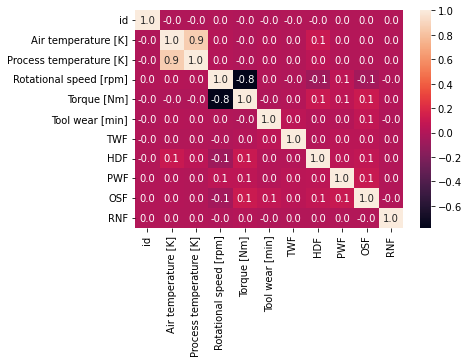

In [12]:
sns.heatmap(X.drop(['Product ID','Type'],axis=1).corr(),annot=True,fmt='.1f')

<AxesSubplot: >

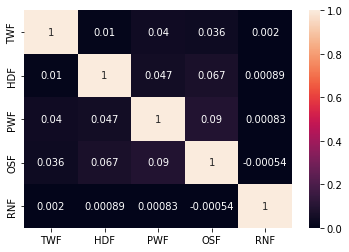

In [13]:
#Como não temos informações dessas classes, faremos um teste isoladas nelas, afim de encontrar alguma redundancia

sns.heatmap(X[['TWF','HDF','PWF','OSF','RNF']].corr(),annot=True)

In [14]:
train_data

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136424,136424,M22284,M,300.1,311.4,1530,37.5,210,0,0,0,0,0,0
136425,136425,H38017,H,297.5,308.5,1447,49.1,2,0,0,0,0,0,0
136426,136426,L54690,L,300.5,311.8,1524,38.5,214,0,0,0,0,0,0
136427,136427,L53876,L,301.7,310.9,1447,46.3,42,0,0,0,0,0,0


<AxesSubplot: xlabel='Type', ylabel='count'>

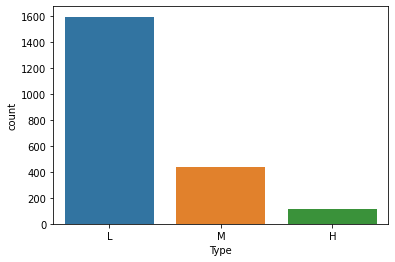

In [15]:
sns.countplot(data=train_data.loc[train_data['Machine failure'] == 1], x='Type')

<AxesSubplot: xlabel='Type', ylabel='count'>

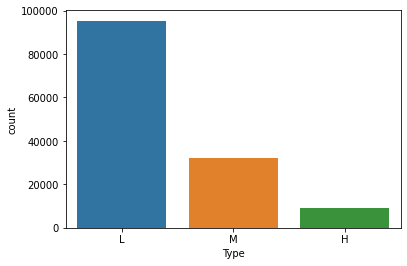

In [16]:
#porem
sns.countplot(data=train_data, x='Type')

The process 'L' has more operations, so there may not be a relationship between the type of process and equipment breakdown., but rather the relationship with the process volume

In [17]:
print('Breaks in the process L: ',np.round((len(train_data.loc[(train_data['Machine failure'] == 1) & (train_data['Type'] == 'L')])/len(train_data.loc[(train_data['Type'] == 'L')]))*100,1))
print('Breaks in the process M: ',np.round((len(train_data.loc[(train_data['Machine failure'] == 1) & (train_data['Type'] == 'M')])/len(train_data.loc[(train_data['Type'] == 'M')]))*100,1))
print('Breaks in the process H: ',np.round((len(train_data.loc[(train_data['Machine failure'] == 1) & (train_data['Type'] == 'H')])/len(train_data.loc[(train_data['Type'] == 'H')]))*100,1))

Breaks in the process L:  1.7
Breaks in the process M:  1.4
Breaks in the process H:  1.3


We have practically the same proportion between Breaks in the process and the total volume of the processes for each 'type', This confirms our hypothesis 

In [18]:
quebrados = train_data.loc[(train_data['Machine failure'] == 1)]

nao_quebrado = train_data.loc[(train_data['Machine failure'] != 1)]

media_quebrados = quebrados[['Product ID','Process temperature [K]']].groupby('Product ID').mean()

media_nao_quebrados = nao_quebrado[['Product ID','Process temperature [K]']].groupby('Product ID').mean()

medias = pd.merge(media_quebrados,media_nao_quebrados,on='Product ID',how='left',suffixes=('_quebrados','_nao_quebrados'))

medias['Dif Medias'] = medias['Process temperature [K]_quebrados'] - medias['Process temperature [K]_nao_quebrados']

medias.sort_values(by='Dif Medias',ascending=False)

,Process temperature [K]_quebrados,Process temperature [K]_nao_quebrados,Dif Medias
Product ID,,,
L56250,311.40,308.162963,3.237037
L48256,310.20,307.780000,2.420000
M19487,312.50,311.187500,1.312500
L47644,309.60,308.360000,1.240000
M16346,310.20,309.150000,1.050000
...,...,...,...
L52106,310.90,312.292857,-1.392857
M23350,307.90,309.591667,-1.691667
M19999,311.05,312.768750,-1.718750


In [19]:
quebrados = train_data.loc[(train_data['Machine failure'] == 1)]

nao_quebrado = train_data.loc[(train_data['Machine failure'] != 1)]

media_quebrados = quebrados[['Product ID','Torque [Nm]']].groupby('Product ID').mean()

media_nao_quebrados = nao_quebrado[['Product ID','Torque [Nm]']].groupby('Product ID').mean()

medias = pd.merge(media_quebrados,media_nao_quebrados,on='Product ID',how='left',suffixes=('_quebrados','_nao_quebrados'))

medias['Dif Medias'] = medias['Torque [Nm]_quebrados'] - medias['Torque [Nm]_nao_quebrados']

medias.sort_values(by='Dif Medias',ascending=False)

,Torque [Nm]_quebrados,Torque [Nm]_nao_quebrados,Dif Medias
Product ID,,,
L47466,71.8,33.020000,38.780000
M23943,75.4,37.168182,38.231818
L54006,67.2,29.600000,37.600000
L48960,70.6,33.162500,37.437500
M16789,68.0,30.900000,37.100000
...,...,...,...
L50411,4.6,42.677778,-38.077778
L52260,4.7,43.233333,-38.533333
L47230,4.6,44.237500,-39.637500


In [20]:
quebrados = train_data.loc[(train_data['Machine failure'] == 1)]

nao_quebrado = train_data.loc[(train_data['Machine failure'] != 1)]

media_quebrados = quebrados[['Product ID','Torque [Nm]']].groupby('Product ID').std()

media_nao_quebrados = nao_quebrado[['Product ID','Torque [Nm]']].groupby('Product ID').std()

medias = pd.merge(media_quebrados,media_nao_quebrados,on='Product ID',how='left',suffixes=('_quebrados','_nao_quebrados'))

medias['Dif Medias'] = medias['Torque [Nm]_quebrados'] - medias['Torque [Nm]_nao_quebrados']

medias.sort_values(by='Dif Medias',ascending=False)

,Torque [Nm]_quebrados,Torque [Nm]_nao_quebrados,Dif Medias
Product ID,,,
L52722,39.810112,3.960704,35.849408
L54691,38.254477,4.801823,33.452654
L51830,41.012193,7.670991,33.341202
L56199,38.466609,9.773872,28.692737
H34202,27.718586,1.484082,26.234504
...,...,...,...
M24620,NaN,8.058542,NaN
M24631,NaN,13.105470,NaN
M24763,NaN,6.228903,NaN


In [21]:
quebrados = train_data.loc[(train_data['Machine failure'] == 1)].set_index('Product ID')

nao_quebrado = train_data.loc[(train_data['Machine failure'] != 1)].set_index('Product ID')

quebrados

,id,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
Product ID,,,,,,,,,,,,,
L52498,130,L,303.9,312.8,1345,56.5,21,1,0,0,0,0,0
L51721,164,L,302.5,310.4,1307,54.8,174,1,0,1,0,0,0
M17895,228,M,300.7,309.7,1878,27.9,20,1,0,0,0,0,0
L55926,236,L,297.3,308.6,1258,61.8,144,1,0,0,0,1,0
L51801,247,L,303.0,311.3,1341,51.0,174,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
L52669,135902,L,302.6,312.1,1638,35.0,215,1,1,0,0,0,0
L56200,135917,L,297.3,308.2,1553,33.5,208,1,1,0,0,0,0
L55410,135957,L,299.1,310.6,1353,49.7,74,1,0,0,0,0,0


In [22]:
quebrados['Dif Tem'] = quebrados['Process temperature [K]'] - quebrados['Air temperature [K]']

nao_quebrado['Dif Tem'] = nao_quebrado['Process temperature [K]'] - nao_quebrado['Air temperature [K]']

In [23]:
quebrados

,id,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Dif Tem
Product ID,,,,,,,,,,,,,,
L52498,130,L,303.9,312.8,1345,56.5,21,1,0,0,0,0,0,8.9
L51721,164,L,302.5,310.4,1307,54.8,174,1,0,1,0,0,0,7.9
M17895,228,M,300.7,309.7,1878,27.9,20,1,0,0,0,0,0,9.0
L55926,236,L,297.3,308.6,1258,61.8,144,1,0,0,0,1,0,11.3
L51801,247,L,303.0,311.3,1341,51.0,174,1,0,1,0,0,0,8.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
L52669,135902,L,302.6,312.1,1638,35.0,215,1,1,0,0,0,0,9.5
L56200,135917,L,297.3,308.2,1553,33.5,208,1,1,0,0,0,0,10.9
L55410,135957,L,299.1,310.6,1353,49.7,74,1,0,0,0,0,0,11.5


In [24]:
quebrados = train_data.loc[(train_data['Machine failure'] == 1)].set_index('Product ID')['Machine failure']

nao_quebrado = train_data.loc[(train_data['Machine failure'] != 1)].set_index('Product ID')['Machine failure']

In [25]:
modelos_quebrados = quebrados.groupby(level=0).count()
modelos_nao_quebrado = nao_quebrado.groupby(level=0).count()

In [26]:
relacao_modelos = pd.merge(modelos_quebrados,modelos_nao_quebrado,on='Product ID')

In [27]:
top_50_mais_quebrados = relacao_modelos.loc[(relacao_modelos['Machine failure_x']/relacao_modelos['Machine failure_y']).sort_values(ascending=False).index].iloc[:50,:]

top_50_mais_quebrados

,Machine failure_x,Machine failure_y
Product ID,,
L51996,6,2
L51919,3,1
H30501,5,2
H30851,5,2
L51359,4,2
M19387,2,1
L49305,12,7
L53358,5,3
L51429,3,2


In [28]:
top_50_mais_quebrados['Rank'] = range(1,len(top_50_mais_quebrados)+1)

top_50_mais_quebrados.reset_index(inplace=True)

top_50_mais_quebrados

,Product ID,Machine failure_x,Machine failure_y,Rank
0,L51996,6,2,1
1,L51919,3,1,2
2,H30501,5,2,3
3,H30851,5,2,4
4,L51359,4,2,5
5,M19387,2,1,6
6,L49305,12,7,7
7,L53358,5,3,8
8,L51429,3,2,9
9,L51903,3,2,10


## Feature Processing

In [30]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, FunctionTransformer

from imblearn.pipeline import make_pipeline, Pipeline

from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, KFold

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, recall_score, roc_auc_score, log_loss, f1_score

from sklearn.compose import ColumnTransformer

import matplotlib.pyplot as plt

In this step, we will treat all the features, normalizing the numeric ones and converting the categorical ones to numeric ones

In [29]:
train_data

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136424,136424,M22284,M,300.1,311.4,1530,37.5,210,0,0,0,0,0,0
136425,136425,H38017,H,297.5,308.5,1447,49.1,2,0,0,0,0,0,0
136426,136426,L54690,L,300.5,311.8,1524,38.5,214,0,0,0,0,0,0
136427,136427,L53876,L,301.7,310.9,1447,46.3,42,0,0,0,0,0,0


ID has no information for our forecast, so let's just discard

The Type Column we will use the One Hot Encoding

As Product ID has many unique values, we can't apply a normal One Hot Encoding without a feature selection, so since I identified a correlation between Product ID and a large number of machine failures, I decided to map the top 50 most failed products instead of simply drop this feature.

In [31]:
def get_rank_by_product_id(product_id):
    # Verifique se o 'Product ID' está no DataFrame
    if product_id in top_50_mais_quebrados['Product ID'].values:
        # Se estiver no DataFrame, retorne o valor da coluna 'rank'
        return top_50_mais_quebrados.loc[top_50_mais_quebrados['Product ID'] == product_id, 'Rank'].values[0]
    else:
        # Caso contrário, retorne 51
        return 51

In [32]:
# Crie um transformador de função personalizada usando a função criada
def custom_encode(product_ids):

    result = []
    result.append([get_rank_by_product_id(product_id) for product_id in product_ids])

    return np.array(result).reshape(-1, 1)

# Crie um transformador de função personalizada
custom_transformer = FunctionTransformer(custom_encode, validate=False)

# Use ColumnTransformer para aplicar o transformador à coluna 'Product ID'
preprocessor = ColumnTransformer(
    transformers=[
        ('custom', custom_transformer, ['Product ID'])
    ])

Let's create a pipeline to automate all the preprocessing work

In [33]:
categorical_features = ['Type']
ordinal_features = ['Product ID']
numeric_features = ['Air temperature [K]', 'Process temperature [K]','Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'TWF','HDF', 'PWF', 'OSF', 'RNF']

categorical_transformer = Pipeline([
    ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore'))
])

ordinal_transformer = Pipeline([
    ('ordinalencoder', OrdinalEncoder())
])

numeric_transformer = Pipeline([
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
    ])

data_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier())])

In [34]:
X = train_data.drop(['id','Machine failure'],axis=1)
y = train_data[['Machine failure']]

X_train, X_valid, y_train, y_valid = train_test_split(X, y,test_size=0.3, random_state=42)


X_test = test.drop('id',axis=1).copy()

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((95500, 12), (40929, 12), (95500, 1), (40929, 1))

In [35]:
X_train['Product ID'] = custom_encode(X_train['Product ID'])

X_valid['Product ID'] = custom_encode(X_valid['Product ID'])

X_test['Product ID'] = custom_encode(X_test['Product ID'])

In [36]:
data_pipeline.fit(X_train, y_train)

c:\Users\iurig\AppData\Local\Programs\Python\Python310\lib\site-packages\imblearn\pipeline.py:297: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, yt, **fit_params_last_step)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Air temperature [K]',
                                                   'Process temperature [K]',
                                                   'Rotational speed [rpm]',
                                                   'Torque [Nm]',
                                                   'Tool wear [min]', 'TWF',
                                                   'HDF', 'PWF', 'OSF',
                                                   'RNF']),
                                                 ('cat',
                                                  Pipeline(steps=[('one_hot_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Type'])])),
                ('model', RandomForestClassifier())])

In [37]:
predict = data_pipeline.predict(X_valid)

In [38]:
data_pipeline.score(X_valid,y_valid)

0.9961396564782917

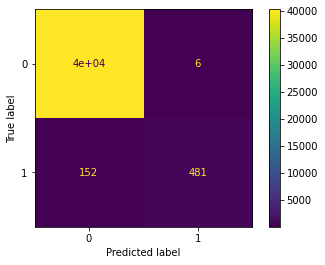

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     40296
           1       0.99      0.76      0.86       633

    accuracy                           1.00     40929
   macro avg       0.99      0.88      0.93     40929
weighted avg       1.00      1.00      1.00     40929



In [39]:
predict = data_pipeline.predict(X_valid)

cm = confusion_matrix(y_valid, predict)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

print(classification_report(y_valid,predict))

Let's try improve our results creating news features for our dataset

In [40]:
def cria_feature(df):

    df['Torque * Rotational speed'] = df['Torque [Nm]'] * df['Rotational speed [rpm]']

    df['Torque * Tool wear'] = df['Torque [Nm]'] * df['Tool wear [min]']

    return df

In [41]:
X_train = cria_feature(X_train)
X_valid = cria_feature(X_valid)
X_test = cria_feature(X_test)

In [42]:
data_pipeline.fit(X_train, y_train)

c:\Users\iurig\AppData\Local\Programs\Python\Python310\lib\site-packages\imblearn\pipeline.py:297: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, yt, **fit_params_last_step)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Air temperature [K]',
                                                   'Process temperature [K]',
                                                   'Rotational speed [rpm]',
                                                   'Torque [Nm]',
                                                   'Tool wear [min]', 'TWF',
                                                   'HDF', 'PWF', 'OSF',
                                                   'RNF']),
                                                 ('cat',
                                                  Pipeline(steps=[('one_hot_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Type'])])),
                ('model', RandomForestClassifier())])

In [43]:
data_pipeline.score(X_valid, y_valid)

0.9960663588164871

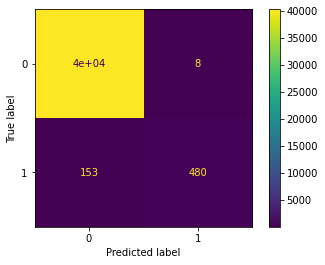

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     40296
           1       0.98      0.76      0.86       633

    accuracy                           1.00     40929
   macro avg       0.99      0.88      0.93     40929
weighted avg       1.00      1.00      1.00     40929



In [44]:
predict = data_pipeline.predict(X_valid)

cm = confusion_matrix(y_valid, predict)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

print(classification_report(y_valid,predict))

This idea does not have a positive effect, but we will still use it to emulate a real need to implement resource increases

# Treating Unbalanced Classes


In [45]:
from imblearn.over_sampling import SMOTE

from imblearn.pipeline import make_pipeline

In [46]:
def validacao_cruzada(metodo_balanceamento, modelo, X, y, oversampling = True):

    X = pd.DataFrame(X)
    y = pd.DataFrame(y)

    kfold = KFold(n_splits=5)

    #Lista de Acuracia de cada split
    recalls_split = []
    roc_aucs_split = []

    #iterando sobre os splits
    for idx, (idx_treino, idx_validacao) in enumerate(kfold.split(X)):
        
        X_split_treino = X.iloc[idx_treino, :]
        y_split_treino = y.iloc[idx_treino, :]

        if oversampling:

            X_split_treino, y_split_treino = metodo_balanceamento.fit_resample(X_split_treino, y_split_treino.values.flatten())

        modelo.fit(X_split_treino, y_split_treino)
            
        X_split_validacao = X.iloc[idx_validacao, :]
        y_split_validacao = y.iloc[idx_validacao, :]        

        predict_validacao = modelo.predict(X_split_validacao)

        recall_split = recall_score(y_split_validacao, predict_validacao)

        roc_auc_split = roc_auc_score(y_split_validacao, predict_validacao)

        recalls_split.append(recall_split)
        
        roc_aucs_split.append(roc_auc_split)
    
    return recalls_split, roc_aucs_split

In [47]:
categorical_features = ['Type']
ordinal_features = ['Product ID']
numeric_features = ['Air temperature [K]', 'Process temperature [K]','Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'TWF','HDF', 'PWF', 'OSF', 'RNF']

categorical_transformer = Pipeline([
    ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore'))
])

ordinal_transformer = Pipeline([
    ('ordinalencoder', OrdinalEncoder())
])

numeric_transformer = Pipeline([
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
    ])

data_pipeline = Pipeline([
    ('preprocessor', preprocessor)])

data_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Air temperature [K]',
                                                   'Process temperature [K]',
                                                   'Rotational speed [rpm]',
                                                   'Torque [Nm]',
                                                   'Tool wear [min]', 'TWF',
                                                   'HDF', 'PWF', 'OSF',
                                                   'RNF']),
                                                 ('cat',
                                                  Pipeline(steps=[('one_hot_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Type'])]))])

In [48]:
X_train_cross = data_pipeline.fit_transform(X_train, y_train)

## Teste com outros métodos e modelos

In [50]:
from imblearn.under_sampling import RandomUnderSampler

In [51]:
recall_cross_RandomUnderSampler, roc_auc_cross_RandomUnderSampler = validacao_cruzada(RandomUnderSampler(random_state=42),RandomForestClassifier(random_state = 42), X_train_cross, y_train)
recall_cross_SMOTE, roc_aucrecall_cross_SMOTE = validacao_cruzada(SMOTE(random_state=42),RandomForestClassifier(random_state = 42), X_train_cross, y_train)

print(f'Random Under Sampler + RandomFlorest: Recall - {np.mean(recall_cross_RandomUnderSampler)} | ROC_AUC - {np.mean(roc_auc_cross_RandomUnderSampler)}')
print(f'SMOTE + RandomFlorest: Recall - {np.mean(recall_cross_SMOTE)} | ROC_AUC - {np.mean(roc_aucrecall_cross_SMOTE)}')

Random Under Sampler + RandomFlorest: Recall - 0.8811161131527662 | ROC_AUC - 0.9121916390520303
SMOTE + RandomFlorest: Recall - 0.7853742513401636 | ROC_AUC - 0.8903835427438105


Random Under Sampler performed better than SMOTE. With that in mind, lets move on to model tests, for this I won't go too far, I will test, in addition to RandomForestClassifier, LightGBM and XGBoost also

In [52]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [53]:
recall_cross_RandomUnderSampler, roc_auc_cross_RandomUnderSampler = validacao_cruzada(RandomUnderSampler(random_state=42),LGBMClassifier(random_state = 42), X_train_cross, y_train)
recall_cross_SMOTE, roc_aucrecall_cross_SMOTE = validacao_cruzada(SMOTE(random_state=42),LGBMClassifier(random_state = 42), X_train_cross, y_train)

print(f'Random Under Sampler + LGBMClassifier: Recall - {np.mean(recall_cross_RandomUnderSampler)} | ROC_AUC - {np.mean(roc_auc_cross_RandomUnderSampler)}')
print(f'SMOTE + LGBMClassifier: Recall - {np.mean(recall_cross_SMOTE)} | ROC_AUC - {np.mean(roc_aucrecall_cross_SMOTE)}')

Random Under Sampler + LGBMClassifier: Recall - 0.8678477153635706 | ROC_AUC - 0.9044609558473926
SMOTE + LGBMClassifier: Recall - 0.798514682794323 | ROC_AUC - 0.896464261939944


In [54]:
recall_cross_RandomUnderSampler, roc_auc_cross_RandomUnderSampler = validacao_cruzada(RandomUnderSampler(random_state=42),XGBClassifier(random_state = 42), X_train_cross, y_train)
recall_cross_SMOTE, roc_aucrecall_cross_SMOTE = validacao_cruzada(SMOTE(random_state=42),XGBClassifier(random_state = 42), X_train_cross, y_train)

print(f'Random Under Sampler + XGBClassifier: Recall - {np.mean(recall_cross_RandomUnderSampler)} | ROC_AUC - {np.mean(roc_auc_cross_RandomUnderSampler)}')
print(f'SMOTE + XGBClassifier: Recall - {np.mean(recall_cross_SMOTE)} | ROC_AUC - {np.mean(roc_aucrecall_cross_SMOTE)}')

Random Under Sampler + XGBClassifier: Recall - 0.8706014543623473 | ROC_AUC - 0.9026406985316833
SMOTE + XGBClassifier: Recall - 0.7999596780690312 | ROC_AUC - 0.8964631044156262


In the other models, Random Under Sampler still performed better than SMOTE, so I only use Random Under Sampler for our optimization

# Bayesian Optimization

As we know, class balance can improve our predictions, so in our optimization we will test with and without class balance and choose the best method. but don't forget our propose with this model, we need the best possible model, so this meens the models with the minium False positive rate

As you know, Bayesian optimization seeks the minimum value on the metric you choose, so we will run the search focused on 3 metrics:

* ROC AUC
* LOG LOSS
* RECALL

But the evaluation for decide the best model will be over 4 metrics:
* NUMBER OF FALSE POSITIVES
* ROC AUC
* LOG LOSS
* RECALL
* F1 SCORE


With this in mind, let's go

In [55]:
#Import the library
from skopt import gp_minimize

In [56]:
X = train.drop(['id','Machine failure'],axis=1)
y = train[['Machine failure']]

X['Product ID'] = custom_encode(X['Product ID'])

X = cria_feature(X)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

data_pipeline.fit(X_train,y_train)

X_train_pipeline = data_pipeline.transform(X_train)
X_valid_pipeline = data_pipeline.transform(X_valid)

## RandomForestClassifier

### Optimization focused on ROC AUC

In [ ]:
# With Class balance

def train_model(params):

    n_estimators = params[0]

    min_samples_leaf = params[1]

    max_features = params[2]

    mdl = RandomForestClassifier(n_estimators=n_estimators,
                                 min_samples_leaf = min_samples_leaf,
                                 max_features = max_features,
                                 n_jobs=-1,
                                 random_state=42)
    
    X_treino_optimizer, y_treino_optimizer = RandomUnderSampler(random_state=42).fit_resample(X_train_pipeline, y_train.values.flatten())

    mdl.fit(X_treino_optimizer, y_treino_optimizer)

    p = mdl.predict_proba(X_valid_pipeline)[:,1]

    return -roc_auc_score(y_valid,p)

space = [(100,1000),
         (2,10),
         (2,14)]

resultado = gp_minimize(train_model, space, random_state=1, n_calls=30, n_random_starts=15)

print(resultado.x)

mdl = RandomForestClassifier(n_estimators=resultado.x[0],
                                min_samples_leaf = resultado.x[1],
                                max_features = resultado.x[2],
                                n_jobs=-1,
                                random_state=42)

X_treino_optimizer, y_treino_optimizer = RandomUnderSampler(random_state=42).fit_resample(X_train_pipeline, y_train.values.flatten())

mdl.fit(X_treino_optimizer, y_treino_optimizer)

predict = mdl.predict(X_valid_pipeline)

predict_proba = mdl.predict_proba(X_valid_pipeline)

cm = confusion_matrix(y_valid, predict)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

print(classification_report(y_valid,predict))

print(f'Log Loss: {log_loss(y_valid,predict_proba):.2f}')
print(f'F1 Score: {f1_score(y_valid,predict):.2f}')
print(f'Recall: {recall_score(y_valid,predict):.2f}')
print(f'Roc AUC: {roc_auc_score(y_valid,predict_proba[:,1]):.2f}')

In [ ]:
#Sem balanceamento de classe

def treinar_modelo(params):

    n_estimators = params[0]

    min_samples_leaf = params[1]

    max_features = params[2]

    mdl = RandomForestClassifier(n_estimators=n_estimators,
                                 min_samples_leaf = min_samples_leaf,
                                 max_features = max_features,
                                 n_jobs=-1,
                                 random_state=42)
    
    X_treino_optimizer, y_treino_optimizer = X_train_pipeline, y_train.values.flatten()

    mdl.fit(X_treino_optimizer, y_treino_optimizer)

    p = mdl.predict_proba(X_valid_pipeline)[:,1]

    return -roc_auc_score(y_valid,p)

space = [(100,1000),
         (2,10),
         (2,14)]

resultado = gp_minimize(treinar_modelo, space, random_state=1, n_calls=30, n_random_starts=15)

print(resultado.x)

mdl = RandomForestClassifier(n_estimators=resultado.x[0],
                                min_samples_leaf = resultado.x[1],
                                max_features = resultado.x[2],
                                n_jobs=-1,
                                random_state=42)

X_treino_optimizer, y_treino_optimizer = X_train_pipeline, y_train.values.flatten()

mdl.fit(X_treino_optimizer, y_treino_optimizer)

predict = mdl.predict(X_valid_pipeline)

predict_proba = mdl.predict_proba(X_valid_pipeline)

cm = confusion_matrix(y_valid, predict)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

print(classification_report(y_valid,predict))

print(f'Log Loss: {log_loss(y_valid,predict_proba):.2f}')
print(f'F1 Score: {f1_score(y_valid,predict):.2f}')
print(f'Recall: {recall_score(y_valid,predict):.2f}')
print(f'Roc AUC: {roc_auc_score(y_valid,predict_proba[:,1]):.2f}')

### Optimization focused em Log Loss

In [ ]:
# Com balanceamento de classes

def treinar_modelo(params):

    n_estimators = params[0]

    min_samples_leaf = params[1]

    max_features = params[2]

    mdl = RandomForestClassifier(n_estimators=n_estimators,
                                 min_samples_leaf = min_samples_leaf,
                                 max_features = max_features,
                                 n_jobs=-1,
                                 random_state=42)
    
    X_treino_optimizer, y_treino_optimizer = RandomUnderSampler(random_state=42).fit_resample(X_train_pipeline, y_train.values.flatten())

    mdl.fit(X_treino_optimizer, y_treino_optimizer)

    p = mdl.predict_proba(X_valid_pipeline)

    return log_loss(y_valid,p)

space = [(100,1000),
         (2,10),
         (2,14)]

resultado = gp_minimize(treinar_modelo, space, random_state=1, n_calls=30, n_random_starts=15)

print(resultado.x)

mdl = RandomForestClassifier(n_estimators=resultado.x[0],
                                min_samples_leaf = resultado.x[1],
                                max_features = resultado.x[2],
                                n_jobs=-1,
                                random_state=42)

X_treino_optimizer, y_treino_optimizer = RandomUnderSampler(random_state=42).fit_resample(X_train_pipeline, y_train.values.flatten())

mdl.fit(X_treino_optimizer, y_treino_optimizer)

predict = mdl.predict(X_valid_pipeline)

predict_proba = mdl.predict_proba(X_valid_pipeline)

cm = confusion_matrix(y_valid, predict)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

print(classification_report(y_valid,predict))

print(f'Log Loss: {log_loss(y_valid,predict_proba):.2f}')
print(f'F1 Score: {f1_score(y_valid,predict):.2f}')
print(f'Recall: {recall_score(y_valid,predict):.2f}')
print(f'Roc AUC: {roc_auc_score(y_valid,predict_proba[:,1]):.2f}')

In [ ]:
#Sem balanceamento de classe

def treinar_modelo(params):

    n_estimators = params[0]

    min_samples_leaf = params[1]

    max_features = params[2]

    mdl = RandomForestClassifier(n_estimators=n_estimators,
                                 min_samples_leaf = min_samples_leaf,
                                 max_features = max_features,
                                 n_jobs=-1,
                                 random_state=42)
    
    X_treino_optimizer, y_treino_optimizer = X_train_pipeline, y_train.values.flatten()

    mdl.fit(X_treino_optimizer, y_treino_optimizer)

    p = mdl.predict_proba(X_valid_pipeline)

    return log_loss(y_valid,p)

space = [(100,1000),
         (2,10),
         (2,14)]

resultado = gp_minimize(treinar_modelo, space, random_state=1, n_calls=30, n_random_starts=15)

print(resultado.x)

mdl = RandomForestClassifier(n_estimators=resultado.x[0],
                                min_samples_leaf = resultado.x[1],
                                max_features = resultado.x[2],
                                n_jobs=-1,
                                random_state=42)

X_treino_optimizer, y_treino_optimizer = X_train_pipeline, y_train.values.flatten()

mdl.fit(X_treino_optimizer, y_treino_optimizer)

predict = mdl.predict(X_valid_pipeline)

predict_proba = mdl.predict_proba(X_valid_pipeline)

cm = confusion_matrix(y_valid, predict)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

print(classification_report(y_valid,predict))

print(f'Log Loss: {log_loss(y_valid,predict_proba):.2f}')
print(f'F1 Score: {f1_score(y_valid,predict):.2f}')
print(f'Recall: {recall_score(y_valid,predict):.2f}')
print(f'Roc AUC: {roc_auc_score(y_valid,predict_proba[:,1]):.2f}')

### Optimization focused em Recall

In [ ]:
# Com balanceamento de classes

def treinar_modelo(params):

    n_estimators = params[0]

    min_samples_leaf = params[1]

    max_features = params[2]

    mdl = RandomForestClassifier(n_estimators=n_estimators,
                                 min_samples_leaf = min_samples_leaf,
                                 max_features = max_features,
                                 n_jobs=-1,
                                 random_state=42)
    
    X_treino_optimizer, y_treino_optimizer = RandomUnderSampler(random_state=42).fit_resample(X_train_pipeline, y_train.values.flatten())

    mdl.fit(X_treino_optimizer, y_treino_optimizer)

    p = mdl.predict(X_valid_pipeline)

    return -recall_score(y_valid,p)

space = [(100,1000),
         (2,10),
         (2,14)]

resultado = gp_minimize(treinar_modelo, space, random_state=1, n_calls=30, n_random_starts=15)

print(resultado.x)

mdl = RandomForestClassifier(n_estimators=resultado.x[0],
                                min_samples_leaf = resultado.x[1],
                                max_features = resultado.x[2],
                                n_jobs=-1,
                                random_state=42)

X_treino_optimizer, y_treino_optimizer = RandomUnderSampler(random_state=42).fit_resample(X_train_pipeline, y_train.values.flatten())

mdl.fit(X_treino_optimizer, y_treino_optimizer)

predict = mdl.predict(X_valid_pipeline)

predict_proba = mdl.predict_proba(X_valid_pipeline)

cm = confusion_matrix(y_valid, predict)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

print(classification_report(y_valid,predict))

print(f'Log Loss: {log_loss(y_valid,predict_proba):.2f}')
print(f'F1 Score: {f1_score(y_valid,predict):.2f}')
print(f'Recall: {recall_score(y_valid,predict):.2f}')
print(f'Roc AUC: {roc_auc_score(y_valid,predict_proba[:,1]):.2f}')

In [ ]:
#Sem balanceamento de classe

def treinar_modelo(params):

    n_estimators = params[0]

    min_samples_leaf = params[1]

    max_features = params[2]

    mdl = RandomForestClassifier(n_estimators=n_estimators,
                                 min_samples_leaf = min_samples_leaf,
                                 max_features = max_features,
                                 n_jobs=-1,
                                 random_state=42)
    
    X_treino_optimizer, y_treino_optimizer = X_train_pipeline, y_train.values.flatten()

    mdl.fit(X_treino_optimizer, y_treino_optimizer)
    
    p = mdl.predict(X_valid_pipeline)

    return -recall_score(y_valid,p)


space = [(100,1000),
         (2,10),
         (2,14)]

resultado = gp_minimize(treinar_modelo, space, random_state=1, n_calls=30, n_random_starts=15)

print(resultado.x)

mdl = RandomForestClassifier(n_estimators=resultado.x[0],
                                min_samples_leaf = resultado.x[1],
                                max_features = resultado.x[2],
                                n_jobs=-1,
                                random_state=42)

X_treino_optimizer, y_treino_optimizer = X_train_pipeline, y_train.values.flatten()

mdl.fit(X_treino_optimizer, y_treino_optimizer)

predict = mdl.predict(X_valid_pipeline)

predict_proba = mdl.predict_proba(X_valid_pipeline)

cm = confusion_matrix(y_valid, predict)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

print(classification_report(y_valid,predict))

print(f'Log Loss: {log_loss(y_valid,predict_proba):.2f}')
print(f'F1 Score: {f1_score(y_valid,predict):.2f}')
print(f'Recall: {recall_score(y_valid,predict):.2f}')
print(f'Roc AUC: {roc_auc_score(y_valid,predict_proba[:,1]):.2f}')

## LGBMClassifier

### Optimization focused em ROC AUC

In [ ]:
#Com balanceamento de Classes

def treinar_modelo(params):

    learning_rate=params[0]
    num_leaves=params[1]
    min_child_samples=params[2]
    subsample=params[3]
    colsample_bytree=params[4]

    mdl = LGBMClassifier(learning_rate=learning_rate,
                         num_leaves=num_leaves,
                         min_child_samples=min_child_samples,
                         subsample=subsample,
                         colsample_bytree=colsample_bytree,
                         n_jobs=-1,
                         random_state=42)

    X_treino_optimizer, y_treino_optimizer = RandomUnderSampler(random_state=42).fit_resample(X_train_pipeline, y_train.values.flatten())

    mdl.fit(X_treino_optimizer, y_treino_optimizer)

    p = mdl.predict_proba(X_valid_pipeline)[:,1]

    return -roc_auc_score(y_valid,p)

space = [(1e-3,1e-1,'log-uniform'),
         (2,128),
         (1,100),
         (0.5,1.0),
         (0.1,1.0),]

resultado = gp_minimize(treinar_modelo, space, random_state=1, n_calls=50, n_random_starts=15)

print(resultado.x)

mdl = LGBMClassifier(learning_rate=resultado.x[0],
                        num_leaves=resultado.x[1],
                        min_child_samples=resultado.x[2],
                        subsample=resultado.x[3],
                        colsample_bytree=resultado.x[4],
                        n_jobs=-1,
                        random_state=42)

X_treino_optimizer, y_treino_optimizer = RandomUnderSampler(random_state=42).fit_resample(X_train_pipeline, y_train.values.flatten())

mdl.fit(X_treino_optimizer, y_treino_optimizer)

predict = mdl.predict(X_valid_pipeline)

predict_proba = mdl.predict_proba(X_valid_pipeline)

cm = confusion_matrix(y_valid, predict)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

print(classification_report(y_valid,predict))

print(f'Log Loss: {log_loss(y_valid,predict_proba):.2f}')
print(f'F1 Score: {f1_score(y_valid,predict):.2f}')
print(f'Recall: {recall_score(y_valid,predict):.2f}')
print(f'Roc AUC: {roc_auc_score(y_valid,predict_proba[:,1]):.2f}')

In [ ]:
#Sem balanceamento de Classes

def treinar_modelo(params):

    learning_rate=params[0]
    num_leaves=params[1]
    min_child_samples=params[2]
    subsample=params[3]
    colsample_bytree=params[4]

    mdl = LGBMClassifier(learning_rate=learning_rate,
                         num_leaves=num_leaves,
                         min_child_samples=min_child_samples,
                         subsample=subsample,
                         colsample_bytree=colsample_bytree,
                         n_jobs=-1,
                         random_state=42)

    X_treino_optimizer, y_treino_optimizer = X_train_pipeline, y_train.values.flatten()

    mdl.fit(X_treino_optimizer, y_treino_optimizer)

    p = mdl.predict_proba(X_valid_pipeline)[:,1]

    return -roc_auc_score(y_valid,p)

space = [(1e-3,1e-1,'log-uniform'),
         (2,128),
         (1,100),
         (0.5,1.0),
         (0.1,1.0),]

resultado = gp_minimize(treinar_modelo, space, random_state=1, n_calls=50, n_random_starts=15)

print(resultado.x)

mdl = LGBMClassifier(learning_rate=resultado.x[0],
                        num_leaves=resultado.x[1],
                        min_child_samples=resultado.x[2],
                        subsample=resultado.x[3],
                        colsample_bytree=resultado.x[4],
                        n_jobs=-1,
                        random_state=42)

mdl.fit(X_train_pipeline, y_train.values.flatten())

predict = mdl.predict(X_valid_pipeline)

predict_proba = mdl.predict_proba(X_valid_pipeline)

cm = confusion_matrix(y_valid, predict)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

print(classification_report(y_valid,predict))

print(f'Log Loss: {log_loss(y_valid,predict_proba):.2f}')
print(f'F1 Score: {f1_score(y_valid,predict):.2f}')
print(f'Recall: {recall_score(y_valid,predict):.2f}')
print(f'Roc AUC: {roc_auc_score(y_valid,predict_proba[:,1]):.2f}')

### Optimization focused em log Loss

In [ ]:
#Com balanceamento de Classes

def treinar_modelo(params):

    learning_rate=params[0]
    num_leaves=params[1]
    min_child_samples=params[2]
    subsample=params[3]
    colsample_bytree=params[4]

    mdl = LGBMClassifier(learning_rate=learning_rate,
                         num_leaves=num_leaves,
                         min_child_samples=min_child_samples,
                         subsample=subsample,
                         colsample_bytree=colsample_bytree,
                         n_jobs=-1,
                         random_state=42)

    X_treino_optimizer, y_treino_optimizer = RandomUnderSampler(random_state=42).fit_resample(X_train_pipeline, y_train.values.flatten())

    mdl.fit(X_treino_optimizer, y_treino_optimizer)

    p = mdl.predict_proba(X_valid_pipeline)

    return log_loss(y_valid,p)

space = [(1e-3,1e-1,'log-uniform'),
         (2,128),
         (1,100),
         (0.5,1.0),
         (0.1,1.0),]

resultado = gp_minimize(treinar_modelo, space, random_state=1, n_calls=50, n_random_starts=15)

print(resultado.x)

mdl = LGBMClassifier(learning_rate=resultado.x[0],
                        num_leaves=resultado.x[1],
                        min_child_samples=resultado.x[2],
                        subsample=resultado.x[3],
                        colsample_bytree=resultado.x[4],
                        n_jobs=-1,
                        random_state=42)

X_treino_optimizer, y_treino_optimizer = RandomUnderSampler(random_state=42).fit_resample(X_train_pipeline, y_train.values.flatten())

mdl.fit(X_treino_optimizer, y_treino_optimizer)

predict = mdl.predict(X_valid_pipeline)

predict_proba = mdl.predict_proba(X_valid_pipeline)

cm = confusion_matrix(y_valid, predict)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

print(classification_report(y_valid,predict))

print(f'Log Loss: {log_loss(y_valid,predict_proba):.2f}')
print(f'F1 Score: {f1_score(y_valid,predict):.2f}')
print(f'Recall: {recall_score(y_valid,predict):.2f}')
print(f'Roc AUC: {roc_auc_score(y_valid,predict_proba[:,1]):.2f}')

In [ ]:
#Sem balanceamento de Classes

def treinar_modelo(params):

    learning_rate=params[0]
    num_leaves=params[1]
    min_child_samples=params[2]
    subsample=params[3]
    colsample_bytree=params[4]

    mdl = LGBMClassifier(learning_rate=learning_rate,
                         num_leaves=num_leaves,
                         min_child_samples=min_child_samples,
                         subsample=subsample,
                         colsample_bytree=colsample_bytree,
                         n_jobs=-1,
                         random_state=42)

    X_treino_optimizer, y_treino_optimizer = X_train_pipeline, y_train.values.flatten()

    mdl.fit(X_treino_optimizer, y_treino_optimizer)

    p = mdl.predict_proba(X_valid_pipeline)

    return log_loss(y_valid,p)

space = [(1e-3,1e-1,'log-uniform'),
         (2,128),
         (1,100),
         (0.5,1.0),
         (0.1,1.0),]

resultado = gp_minimize(treinar_modelo, space, random_state=1, n_calls=50, n_random_starts=15)

print(resultado.x)

mdl = LGBMClassifier(learning_rate=resultado.x[0],
                        num_leaves=resultado.x[1],
                        min_child_samples=resultado.x[2],
                        subsample=resultado.x[3],
                        colsample_bytree=resultado.x[4],
                        n_jobs=-1,
                        random_state=42)

mdl.fit(X_train_pipeline, y_train.values.flatten())

predict = mdl.predict(X_valid_pipeline)

predict_proba = mdl.predict_proba(X_valid_pipeline)

cm = confusion_matrix(y_valid, predict)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

print(classification_report(y_valid,predict))

print(f'Log Loss: {log_loss(y_valid,predict_proba):.2f}')
print(f'F1 Score: {f1_score(y_valid,predict):.2f}')
print(f'Recall: {recall_score(y_valid,predict):.2f}')
print(f'Roc AUC: {roc_auc_score(y_valid,predict_proba[:,1]):.2f}')

### Optimization focused em Recall

In [ ]:
#Com balanceamento de Classes

def treinar_modelo(params):

    learning_rate=params[0]
    num_leaves=params[1]
    min_child_samples=params[2]
    subsample=params[3]
    colsample_bytree=params[4]

    mdl = LGBMClassifier(learning_rate=learning_rate,
                         num_leaves=num_leaves,
                         min_child_samples=min_child_samples,
                         subsample=subsample,
                         colsample_bytree=colsample_bytree,
                         n_jobs=-1,
                         random_state=42)

    X_treino_optimizer, y_treino_optimizer = RandomUnderSampler(random_state=42).fit_resample(X_train_pipeline, y_train.values.flatten())

    mdl.fit(X_treino_optimizer, y_treino_optimizer)

    p = mdl.predict(X_valid_pipeline)

    return -recall_score(y_valid,p)

space = [(1e-3,1e-1,'log-uniform'),
         (2,128),
         (1,100),
         (0.5,1.0),
         (0.1,1.0),]

resultado = gp_minimize(treinar_modelo, space, random_state=1, n_calls=50, n_random_starts=15)

print(resultado.x)

mdl = LGBMClassifier(learning_rate=resultado.x[0],
                        num_leaves=resultado.x[1],
                        min_child_samples=resultado.x[2],
                        subsample=resultado.x[3],
                        colsample_bytree=resultado.x[4],
                        n_jobs=-1,
                        random_state=42)

X_treino_optimizer, y_treino_optimizer = RandomUnderSampler(random_state=42).fit_resample(X_train_pipeline, y_train.values.flatten())

mdl.fit(X_treino_optimizer, y_treino_optimizer)

predict = mdl.predict(X_valid_pipeline)

predict_proba = mdl.predict_proba(X_valid_pipeline)

cm = confusion_matrix(y_valid, predict)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

print(classification_report(y_valid,predict))

print(f'Log Loss: {log_loss(y_valid,predict_proba):.2f}')
print(f'F1 Score: {f1_score(y_valid,predict):.2f}')
print(f'Recall: {recall_score(y_valid,predict):.2f}')
print(f'Roc AUC: {roc_auc_score(y_valid,predict_proba[:,1]):.2f}')

In [ ]:
#Sem balanceamento de Classes

def treinar_modelo(params):

    learning_rate=params[0]
    num_leaves=params[1]
    min_child_samples=params[2]
    subsample=params[3]
    colsample_bytree=params[4]

    mdl = LGBMClassifier(learning_rate=learning_rate,
                         num_leaves=num_leaves,
                         min_child_samples=min_child_samples,
                         subsample=subsample,
                         colsample_bytree=colsample_bytree,
                         n_jobs=-1,
                         random_state=42)

    X_treino_optimizer, y_treino_optimizer = X_train_pipeline, y_train.values.flatten()

    mdl.fit(X_treino_optimizer, y_treino_optimizer)

    p = mdl.predict(X_valid_pipeline)

    return -recall_score(y_valid,p)

space = [(1e-3,1e-1,'log-uniform'),
         (2,128),
         (1,100),
         (0.5,1.0),
         (0.1,1.0),]

resultado = gp_minimize(treinar_modelo, space, random_state=1, n_calls=50, n_random_starts=15)

print(resultado.x)

mdl = LGBMClassifier(learning_rate=resultado.x[0],
                        num_leaves=resultado.x[1],
                        min_child_samples=resultado.x[2],
                        subsample=resultado.x[3],
                        colsample_bytree=resultado.x[4],
                        n_jobs=-1,
                        random_state=42)

mdl.fit(X_train_pipeline, y_train.values.flatten())

predict = mdl.predict(X_valid_pipeline)

predict_proba = mdl.predict_proba(X_valid_pipeline)

cm = confusion_matrix(y_valid, predict)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

print(classification_report(y_valid,predict))

print(f'Log Loss: {log_loss(y_valid,predict_proba):.2f}')
print(f'F1 Score: {f1_score(y_valid,predict):.2f}')
print(f'Recall: {recall_score(y_valid,predict):.2f}')
print(f'Roc AUC: {roc_auc_score(y_valid,predict_proba[:,1]):.2f}')

## XGBClassifier

### Optimization focused em ROC AUC

In [ ]:
#Com balanceamento de Classes

def treinar_modelo(params):

    learning_rate=params[0]
    n_estimators=params[1]
    max_depth=params[2]
    subsample=params[3]
    colsample_bytre=params[4]

    mdl = XGBClassifier(learning_rate=learning_rate,
                         n_estimators=n_estimators,
                         max_depth=max_depth,
                         subsample=subsample,
                         colsample_bytree=colsample_bytre,
                         n_jobs=-1,
                         random_state=42)
    
    X_treino_optimizer, y_treino_optimizer = RandomUnderSampler(random_state=42).fit_resample(X_train_pipeline, y_train.values.flatten())

    mdl.fit(X_treino_optimizer, y_treino_optimizer)

    p = mdl.predict_proba(X_valid_pipeline)[:,1]

    return -roc_auc_score(y_valid,p)

space = [(1e-3,1e-1,'log-uniform'),
         (500,5000),
         (2,10),
         (0,1),
         (0,1),]

resultado = gp_minimize(treinar_modelo, space, random_state=1, n_calls=30, n_random_starts=15)

print(resultado.x)

mdl = XGBClassifier(learning_rate=resultado.x[0],
                        n_estimators=resultado.x[1],
                        max_depth=resultado.x[2],
                        subsample=resultado.x[3],
                        colsample_bytree=resultado.x[4],
                        n_jobs=-1,
                        random_state=42)

X_treino_optimizer, y_treino_optimizer = RandomUnderSampler(random_state=42).fit_resample(X_train_pipeline, y_train.values.flatten())

mdl.fit(X_treino_optimizer, y_treino_optimizer)

predict = mdl.predict(X_valid_pipeline)

predict_proba = mdl.predict_proba(X_valid_pipeline)

cm = confusion_matrix(y_valid, predict)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

print(classification_report(y_valid,predict))

print(f'Log Loss: {log_loss(y_valid,predict_proba):.2f}')
print(f'F1 Score: {f1_score(y_valid,predict):.2f}')
print(f'Recall: {recall_score(y_valid,predict):.2f}')
print(f'Roc AUC: {roc_auc_score(y_valid,predict_proba[:,1]):.2f}')

In [ ]:
#Sem balanceamento de Classes

def treinar_modelo(params):

    learning_rate=params[0]
    n_estimators=params[1]
    max_depth=params[2]
    subsample=params[3]
    colsample_bytre=params[4]

    mdl = XGBClassifier(learning_rate=learning_rate,
                         n_estimators=n_estimators,
                         max_depth=max_depth,
                         subsample=subsample,
                         colsample_bytree=colsample_bytre,
                         n_jobs=-1,
                         random_state=42)
    
    X_treino_optimizer, y_treino_optimizer = X_train_pipeline, y_train.values.flatten()

    mdl.fit(X_treino_optimizer, y_treino_optimizer)

    p = mdl.predict_proba(X_valid_pipeline)[:,1]

    return -roc_auc_score(y_valid,p)

space = [(1e-3,1e-1,'log-uniform'),
         (500,5000),
         (2,10),
         (0,1),
         (0,1),]

resultado = gp_minimize(treinar_modelo, space, random_state=1, n_calls=30, n_random_starts=15)

print(resultado.x)

mdl = XGBClassifier(learning_rate=resultado.x[0],
                        n_estimators=resultado.x[1],
                        max_depth=resultado.x[2],
                        subsample=resultado.x[3],
                        colsample_bytree=resultado.x[4],
                        n_jobs=-1,
                        random_state=42)

X_treino_optimizer, y_treino_optimizer = X_train_pipeline, y_train.values.flatten()

mdl.fit(X_treino_optimizer, y_treino_optimizer)

predict = mdl.predict(X_valid_pipeline)

predict_proba = mdl.predict_proba(X_valid_pipeline)

cm = confusion_matrix(y_valid, predict)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

print(classification_report(y_valid,predict))

print(f'Log Loss: {log_loss(y_valid,predict_proba):.2f}')
print(f'F1 Score: {f1_score(y_valid,predict):.2f}')
print(f'Recall: {recall_score(y_valid,predict):.2f}')
print(f'Roc AUC: {roc_auc_score(y_valid,predict_proba[:,1]):.2f}')

### Optimization focused em Log Loss

In [ ]:
#Com balanceamento de Classes

def treinar_modelo(params):

    learning_rate=params[0]
    n_estimators=params[1]
    max_depth=params[2]
    subsample=params[3]
    colsample_bytre=params[4]

    mdl = XGBClassifier(learning_rate=learning_rate,
                         n_estimators=n_estimators,
                         max_depth=max_depth,
                         subsample=subsample,
                         colsample_bytree=colsample_bytre,
                         n_jobs=-1,
                         random_state=42)
    
    X_treino_optimizer, y_treino_optimizer = RandomUnderSampler(random_state=42).fit_resample(X_train_pipeline, y_train.values.flatten())

    mdl.fit(X_treino_optimizer, y_treino_optimizer)

    p = mdl.predict_proba(X_valid_pipeline)

    return log_loss(y_valid,p)

space = [(1e-3,1e-1,'log-uniform'),
         (100,1000),
         (2,10),
         (0,1),
         (0,1),]

resultado = gp_minimize(treinar_modelo, space, random_state=1, n_calls=30, n_random_starts=15)

print(resultado.x)

mdl = XGBClassifier(learning_rate=resultado.x[0],
                        n_estimators=resultado.x[1],
                        max_depth=resultado.x[2],
                        subsample=resultado.x[3],
                        colsample_bytree=resultado.x[4],
                        n_jobs=-1,
                        random_state=42)

X_treino_optimizer, y_treino_optimizer = RandomUnderSampler(random_state=42).fit_resample(X_train_pipeline, y_train.values.flatten())

mdl.fit(X_treino_optimizer, y_treino_optimizer)

predict = mdl.predict(X_valid_pipeline)

predict_proba = mdl.predict_proba(X_valid_pipeline)

cm = confusion_matrix(y_valid, predict)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

print(classification_report(y_valid,predict))

print(f'Log Loss: {log_loss(y_valid,predict_proba):.2f}')
print(f'F1 Score: {f1_score(y_valid,predict):.2f}')
print(f'Recall: {recall_score(y_valid,predict):.2f}')
print(f'Roc AUC: {roc_auc_score(y_valid,predict_proba[:,1]):.2f}')

In [ ]:
#Sem balanceamento de Classes

def treinar_modelo(params):

    learning_rate=params[0]
    n_estimators=params[1]
    max_depth=params[2]
    subsample=params[3]
    colsample_bytre=params[4]

    mdl = XGBClassifier(learning_rate=learning_rate,
                         n_estimators=n_estimators,
                         max_depth=max_depth,
                         subsample=subsample,
                         colsample_bytree=colsample_bytre,
                         n_jobs=-1,
                         random_state=42)
    
    X_treino_optimizer, y_treino_optimizer = X_train_pipeline, y_train.values.flatten()

    mdl.fit(X_treino_optimizer, y_treino_optimizer)

    p = mdl.predict_proba(X_valid_pipeline)

    return log_loss(y_valid,p)

space = [(1e-3,1e-1,'log-uniform'),
         (100,1000),
         (2,10),
         (0,1),
         (0,1),]

resultado = gp_minimize(treinar_modelo, space, random_state=1, n_calls=30, n_random_starts=15)

print(resultado.x)

mdl = XGBClassifier(learning_rate=resultado.x[0],
                        n_estimators=resultado.x[1],
                        max_depth=resultado.x[2],
                        subsample=resultado.x[3],
                        colsample_bytree=resultado.x[4],
                        n_jobs=-1,
                        random_state=42)

X_treino_optimizer, y_treino_optimizer = X_train_pipeline, y_train.values.flatten()

mdl.fit(X_treino_optimizer, y_treino_optimizer)

predict = mdl.predict(X_valid_pipeline)

predict_proba = mdl.predict_proba(X_valid_pipeline)

cm = confusion_matrix(y_valid, predict)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

print(classification_report(y_valid,predict))

print(f'Log Loss: {log_loss(y_valid,predict_proba):.2f}')
print(f'F1 Score: {f1_score(y_valid,predict):.2f}')
print(f'Recall: {recall_score(y_valid,predict):.2f}')
print(f'Roc AUC: {roc_auc_score(y_valid,predict_proba[:,1]):.2f}')

### Optimization focused em Recall

In [ ]:
#Com balanceamento de Classes

def treinar_modelo(params):

    learning_rate=params[0]
    n_estimators=params[1]
    max_depth=params[2]
    subsample=params[3]
    colsample_bytre=params[4]

    mdl = XGBClassifier(learning_rate=learning_rate,
                         n_estimators=n_estimators,
                         max_depth=max_depth,
                         subsample=subsample,
                         colsample_bytree=colsample_bytre,
                         n_jobs=-1,
                         random_state=42)
    
    X_treino_optimizer, y_treino_optimizer = RandomUnderSampler(random_state=42).fit_resample(X_train_pipeline, y_train.values.flatten())

    mdl.fit(X_treino_optimizer, y_treino_optimizer)

    p = mdl.predict(X_valid_pipeline)

    return -recall_score(y_valid,p)

space = [(1e-3,1e-1,'log-uniform'),
         (100,1000),
         (2,10),
         (0,1),
         (0,1),]

resultado = gp_minimize(treinar_modelo, space, random_state=1, n_calls=30, n_random_starts=15)

print(resultado.x)

mdl = XGBClassifier(learning_rate=resultado.x[0],
                        n_estimators=resultado.x[1],
                        max_depth=resultado.x[2],
                        subsample=resultado.x[3],
                        colsample_bytree=resultado.x[4],
                        n_jobs=-1,
                        random_state=42)

X_treino_optimizer, y_treino_optimizer = RandomUnderSampler(random_state=42).fit_resample(X_train_pipeline, y_train.values.flatten())

mdl.fit(X_treino_optimizer, y_treino_optimizer)

predict = mdl.predict(X_valid_pipeline)

predict_proba = mdl.predict_proba(X_valid_pipeline)

cm = confusion_matrix(y_valid, predict)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

print(classification_report(y_valid,predict))

print(f'Log Loss: {log_loss(y_valid,predict_proba):.2f}')
print(f'F1 Score: {f1_score(y_valid,predict):.2f}')
print(f'Recall: {recall_score(y_valid,predict):.2f}')
print(f'Roc AUC: {roc_auc_score(y_valid,predict_proba[:,1]):.2f}')

In [ ]:
#Sem balanceamento de Classes

def treinar_modelo(params):

    learning_rate=params[0]
    n_estimators=params[1]
    max_depth=params[2]
    subsample=params[3]
    colsample_bytre=params[4]

    mdl = XGBClassifier(learning_rate=learning_rate,
                         n_estimators=n_estimators,
                         max_depth=max_depth,
                         subsample=subsample,
                         colsample_bytree=colsample_bytre,
                         n_jobs=-1,
                         random_state=42)
    
    X_treino_optimizer, y_treino_optimizer = X_train_pipeline, y_train.values.flatten()

    mdl.fit(X_treino_optimizer, y_treino_optimizer)

    p = mdl.predict(X_valid_pipeline)

    return -recall_score(y_valid,p)

space = [(1e-3,1e-1,'log-uniform'),
         (100,1000),
         (2,10),
         (0,1),
         (0,1),]

resultado = gp_minimize(treinar_modelo, space, random_state=1, n_calls=30, n_random_starts=15)

print(resultado.x)

mdl = XGBClassifier(learning_rate=resultado.x[0],
                        n_estimators=resultado.x[1],
                        max_depth=resultado.x[2],
                        subsample=resultado.x[3],
                        colsample_bytree=resultado.x[4],
                        n_jobs=-1,
                        random_state=42)

X_treino_optimizer, y_treino_optimizer = X_train_pipeline, y_train.values.flatten()

mdl.fit(X_treino_optimizer, y_treino_optimizer)

predict = mdl.predict(X_valid_pipeline)

predict_proba = mdl.predict_proba(X_valid_pipeline)

cm = confusion_matrix(y_valid, predict)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

print(classification_report(y_valid,predict))

print(f'Log Loss: {log_loss(y_valid,predict_proba):.2f}')
print(f'F1 Score: {f1_score(y_valid,predict):.2f}')
print(f'Recall: {recall_score(y_valid,predict):.2f}')
print(f'Roc AUC: {roc_auc_score(y_valid,predict_proba[:,1]):.2f}')

# Ensemble

Wow, definitely Bayesian Optimization are extremely powerful, well, with all this information in hand, lets choose the best models and create a ensamble to improve their predictions

For this ensamble, we will use 3 models, being:

* 1° - LGBM - OPTIMIZED IN LOG LOSS     - WITHOUT CLASS BALANCE
* 2° - LGBM - OPTIMIZED IN RECALL       - WITHOUT CLASS BALANCE
* 3° - XGB  - OPTIMIZED IN LOG LOSS	    - WITHOUT CLASS BALANCE
* 4° - XGB  - OPTIMIZED IN RECALL       - WITHOUT CLASS BALANCE

They show us very good metrics, the purpose of this ensemble is to extract the best from each model and compensate for its weaknesses

Let's evaluate, with a cross validation, and generate prediction for our ensemble model and decide if is worth use ou not this ensemble

In [57]:
X = train.drop(['id','Machine failure'],axis=1)
y = train[['Machine failure']]

X['Product ID'] = custom_encode(X['Product ID'])

X = cria_feature(X)

X_train, X_valid, y_train, y_valid = train_test_split(X, y,test_size=0.3, random_state=42)

data_pipeline.fit(X_train,y_train)

X_train_pipeline = data_pipeline.transform(X_train)
X_valid_pipeline = data_pipeline.transform(X_valid)

kf = KFold(n_splits=5, random_state=0, shuffle=True)

second_level = np.zeros((X_train_pipeline.shape[0],4))

#Cross validation
for tr, ts in kf.split(X_train_pipeline, y_train):

    Xtr, Xval = X_train_pipeline[tr], X_train_pipeline[ts]
    ytr, yval = y_train.iloc[tr], y_train.iloc[ts]

    #Primeiro Modelo
    mdl_1 = LGBMClassifier(learning_rate=0.045,
                        num_leaves=107,
                        min_child_samples=28,
                        subsample=0.53,
                        colsample_bytree=0.70,
                        n_jobs=-1,
                        random_state=42)
        
    mdl_1.fit(Xtr,ytr.values.flatten())
    p_mdl_1 = mdl_1.predict_proba(Xval)
    p_mdl_1_ = mdl_1.predict(Xval)
    
    print('ROC AUC: {} - Log Loss: {} - Recall: {}'.format(roc_auc_score(yval,p_mdl_1[:,1]), log_loss(yval,p_mdl_1), recall_score(yval,p_mdl_1_)))

    #Segundo Modelo
    mdl_2 = LGBMClassifier(learning_rate=0.1,
                        num_leaves=128,
                        min_child_samples=1,
                        subsample=0.5,
                        colsample_bytree=1.0,
                        n_jobs=-1,
                        random_state=42)
        
    mdl_2.fit(Xtr,ytr.values.flatten())
    p_mdl_2 = mdl_2.predict_proba(Xval)
    p_mdl_2_ = mdl_2.predict(Xval)

    print('ROC AUC: {} - Log Loss: {} - Recall: {}'.format(roc_auc_score(yval,p_mdl_2[:,1]), log_loss(yval,p_mdl_2), recall_score(yval,p_mdl_2_)))

    #Terceiro Modelo
    mdl_3 = XGBClassifier(learning_rate=0.012,
                         n_estimators=955,
                         max_depth=6,
                         subsample=1,
                         colsample_bytree=1,
                         n_jobs=-1,
                         random_state=42)
        
    mdl_3.fit(Xtr,ytr.values.flatten())
    p_mdl_3 = mdl_3.predict_proba(Xval)
    p_mdl_3_ = mdl_3.predict(Xval)

    print('ROC AUC: {} - Log Loss: {} - Recall: {}'.format(roc_auc_score(yval,p_mdl_3[:,1]), log_loss(yval,p_mdl_3), recall_score(yval,p_mdl_3_)))

    #Quarto Modelo
    mdl_4 = XGBClassifier(learning_rate=0.1,
                         n_estimators=1000,
                         max_depth=10,
                         subsample=1,
                         colsample_bytree=1,
                         n_jobs=-1,
                         random_state=42)
        
    mdl_4.fit(Xtr,ytr.values.flatten())
    p_mdl_4 = mdl_4.predict_proba(Xval)
    p_mdl_4_ = mdl_4.predict(Xval)

    print('ROC AUC: {} - Log Loss: {} - Recall: {}'.format(roc_auc_score(yval,p_mdl_4[:,1]), log_loss(yval,p_mdl_4), recall_score(yval,p_mdl_4_)))

    #fill the predicts list
    second_level[ts, 0] = p_mdl_1[:,1]
    second_level[ts, 1] = p_mdl_2[:,1]
    second_level[ts, 2] = p_mdl_3[:,1]
    second_level[ts, 3] = p_mdl_4[:,1]

    print()

ROC AUC: 0.9599347450867286 - Log Loss: 0.022836108823036463 - Recall: 0.7423728813559322
ROC AUC: 0.9472971937683361 - Log Loss: 0.04851570647036699 - Recall: 0.735593220338983
ROC AUC: 0.9592916597190614 - Log Loss: 0.022517419913133784 - Recall: 0.7389830508474576
ROC AUC: 0.939444431926237 - Log Loss: 0.03463629680574868 - Recall: 0.7423728813559322

ROC AUC: 0.9641509533118917 - Log Loss: 0.021460400145497088 - Recall: 0.7738853503184714
ROC AUC: 0.9664336194252259 - Log Loss: 0.03831622409033704 - Recall: 0.7707006369426752
ROC AUC: 0.9659341113893597 - Log Loss: 0.021139105393181624 - Recall: 0.7738853503184714
ROC AUC: 0.9516736782574909 - Log Loss: 0.031788026733109785 - Recall: 0.767515923566879

ROC AUC: 0.9674657153131196 - Log Loss: 0.019830059263791066 - Recall: 0.7810457516339869
ROC AUC: 0.9614005582368451 - Log Loss: 0.035874186526529975 - Recall: 0.7843137254901961
ROC AUC: 0.9644129227725995 - Log Loss: 0.01963087869087339 - Recall: 0.7745098039215687
ROC AUC: 0.9588

In [58]:
for tr, ts in kf.split(X_train_pipeline, y_train):
    
    Xtr, Xval = second_level[tr], second_level[ts]
    ytr, yval = y_train.iloc[tr], y_train.iloc[ts]

    lr_stack = LGBMClassifier()
    lr_stack.fit(Xtr,ytr.values.flatten())
    
    plt_stack = lr_stack.predict_proba(Xval)
    plt_stack_ = lr_stack.predict(Xval)

    print('Stack ROC ACU: {} - Stack Log Loss: {} - Stack Recall: {}'.format(roc_auc_score(yval,plt_stack[:,1]),log_loss(yval,plt_stack), recall_score(yval,plt_stack_)))

Stack ROC ACU: 0.9534519758989451 - Stack Log Loss: 0.024814708491737846 - Stack Recall: 0.7322033898305085
Stack ROC ACU: 0.9609698847427377 - Stack Log Loss: 0.023527771523225154 - Stack Recall: 0.7643312101910829
Stack ROC ACU: 0.9617338067148395 - Stack Log Loss: 0.02139773121282494 - Stack Recall: 0.7712418300653595
Stack ROC ACU: 0.9540606583522346 - Stack Log Loss: 0.023653685184065323 - Stack Recall: 0.7450980392156863
Stack ROC ACU: 0.9698986103002298 - Stack Log Loss: 0.0194843252086064 - Stack Recall: 0.7789115646258503


Well, in this case, the ensamble did not achieve better models performance, in some cases the ensemble is worse compared to isolated models

But for educational purposes, we will still use the ensemble to emulate real deployment challenges as much as possible.

I need add some information before the next step, the method I used previously, cause Data Leakage, at this moment I will not discuss this subject, but in summary, this occurs becaouse i trined the model with data they already know, I cannot train the models with a data set, and use the same dataset to predict and generate the predictions for ensemble model training

To avoid this, we need to split our X_tain and y_train, into X_train_ensemble and y_train_ensemble, with this i can generate prediction data for the ensemble model with data the forecast models never saw on the training process

In [59]:
X_train_ensamble, X_valid_ensamble, y_train_ensamble, y_valid_ensamble = train_test_split(X_train, y_train, test_size=0.3, random_state=42, shuffle=True)

X_train_pipeline_ensamble = data_pipeline.transform(X_train_ensamble)
X_valid_pipeline_ensamble = data_pipeline.transform(X_valid_ensamble)

#Primerio Modelo
mdl_1 = LGBMClassifier(learning_rate=0.045,
                    num_leaves=107,
                    min_child_samples=28,
                    subsample=0.53,
                    colsample_bytree=0.70,
                    n_jobs=-1,
                    random_state=42)

mdl_1.fit(X_train_pipeline_ensamble, y_train_ensamble.values.flatten())

#Segundo Modelo
mdl_2 = LGBMClassifier(learning_rate=0.1,
                    num_leaves=128,
                    min_child_samples=1,
                    subsample=0.5,
                    colsample_bytree=1.0,
                    n_jobs=-1,
                    random_state=42)
    
mdl_2.fit(X_train_pipeline_ensamble, y_train_ensamble.values.flatten())

#Terceiro Modelo
mdl_3 = XGBClassifier(learning_rate=0.012,
                        n_estimators=955,
                        max_depth=6,
                        subsample=1,
                        colsample_bytree=1,
                        n_jobs=-1,
                        random_state=42)
    
mdl_3.fit(X_train_pipeline_ensamble, y_train_ensamble.values.flatten())

#Quarto Modelo
mdl_4 = XGBClassifier(learning_rate=0.1,
                        n_estimators=1000,
                        max_depth=10,
                        subsample=1,
                        colsample_bytree=1,
                        n_jobs=-1,
                        random_state=42)
    
mdl_4.fit(X_train_pipeline_ensamble, y_train_ensamble.values.flatten())

#Cria o array de predictions
ensamble_valid_ensamble = np.zeros((X_valid_pipeline_ensamble.shape[0],4))

ensamble_valid_ensamble[:, 0] = mdl_1.predict_proba(X_valid_pipeline_ensamble)[:,1]
ensamble_valid_ensamble[:, 1] = mdl_2.predict_proba(X_valid_pipeline_ensamble)[:,1]
ensamble_valid_ensamble[:, 2] = mdl_3.predict_proba(X_valid_pipeline_ensamble)[:,1]
ensamble_valid_ensamble[:, 3] = mdl_4.predict_proba(X_valid_pipeline_ensamble)[:,1]


#Cria e Treina o modelo de ensamble
lr_stack = LGBMClassifier()

lr_stack.fit(ensamble_valid_ensamble, y_valid_ensamble.values.flatten())

LGBMClassifier()

So we can validade our ensemble model

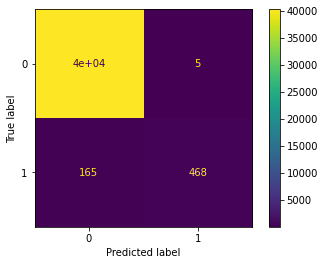

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     40296
           1       0.99      0.74      0.85       633

    accuracy                           1.00     40929
   macro avg       0.99      0.87      0.92     40929
weighted avg       1.00      1.00      1.00     40929

Log Loss: 0.03
F1 Score: 0.85
Recall: 0.74
Roc AUC: 0.96


In [60]:
ensamble_valid = np.zeros((X_valid_pipeline.shape[0],4))

ensamble_valid[:, 0] = mdl_1.predict_proba(X_valid_pipeline)[:,1]
ensamble_valid[:, 1] = mdl_2.predict_proba(X_valid_pipeline)[:,1]
ensamble_valid[:, 2] = mdl_3.predict_proba(X_valid_pipeline)[:,1]
ensamble_valid[:, 3] = mdl_4.predict_proba(X_valid_pipeline)[:,1]

predict = lr_stack.predict(ensamble_valid)

predict_proba = lr_stack.predict_proba(ensamble_valid)

cm = confusion_matrix(y_valid, predict)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

print(classification_report(y_valid,predict))

print(f'Log Loss: {log_loss(y_valid,predict_proba):.2f}')
print(f'F1 Score: {f1_score(y_valid,predict):.2f}')
print(f'Recall: {recall_score(y_valid,predict):.2f}')
print(f'Roc AUC: {roc_auc_score(y_valid,predict_proba[:,1]):.2f}')

As i said, the ensemble performed worse when comparing each isolated model, but it was an expected result, let's try some simple method, let's predict the probability of class 1 and take the average of all models and see how it performs

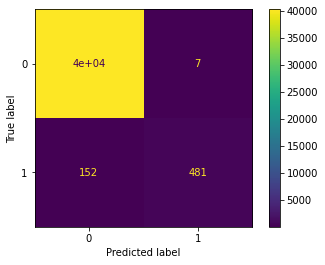

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     40296
           1       0.99      0.76      0.86       633

    accuracy                           1.00     40929
   macro avg       0.99      0.88      0.93     40929
weighted avg       1.00      1.00      1.00     40929

Log Loss: 0.02
F1 Score: 0.86
Recall: 0.76
Roc AUC: 0.96


In [71]:
ensamble_valid = np.zeros((X_valid_pipeline.shape[0],4))

ensamble_valid[:, 0] = mdl_1.predict_proba(X_valid_pipeline)[:,1]
ensamble_valid[:, 1] = mdl_2.predict_proba(X_valid_pipeline)[:,1]
ensamble_valid[:, 2] = mdl_3.predict_proba(X_valid_pipeline)[:,1]
ensamble_valid[:, 3] = mdl_4.predict_proba(X_valid_pipeline)[:,1]

predict = (pd.DataFrame(ensamble_valid).mean(axis=1) >0.5).astype(int)

predict_proba = pd.DataFrame(ensamble_valid).mean(axis=1)

cm = confusion_matrix(y_valid, predict)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

print(classification_report(y_valid,predict))

print(f'Log Loss: {log_loss(y_valid,predict_proba):.2f}')
print(f'F1 Score: {f1_score(y_valid,predict):.2f}')
print(f'Recall: {recall_score(y_valid,predict):.2f}')
print(f'Roc AUC: {roc_auc_score(y_valid,predict_proba):.2f}')

It looks better than the Ensemble model lol, so in our deploy we will use the simplest method

## Retrain

With all the methods difined, let's retrain everything again, but now with all the training data

In [74]:
X = train.drop(['id','Machine failure'],axis=1)
y = train[['Machine failure']]

X['Product ID'] = custom_encode(X['Product ID'])
X = cria_feature(X)

data_pipeline.fit(X,y)

X_train_submiss = data_pipeline.transform(X)

#First Model
mdl_1 = LGBMClassifier(learning_rate=0.045,
                    num_leaves=107,
                    min_child_samples=28,
                    subsample=0.53,
                    colsample_bytree=0.70,
                    n_jobs=-1,
                    random_state=42)

mdl_1.fit(X_train_submiss, y.values.flatten())

#Second Model
mdl_2 = LGBMClassifier(learning_rate=0.1,
                    num_leaves=128,
                    min_child_samples=1,
                    subsample=0.5,
                    colsample_bytree=1.0,
                    n_jobs=-1,
                    random_state=42)
    
mdl_2.fit(X_train_submiss, y.values.flatten())

#Third Model
mdl_3 = XGBClassifier(learning_rate=0.012,
                        n_estimators=955,
                        max_depth=6,
                        subsample=1,
                        colsample_bytree=1,
                        n_jobs=-1,
                        random_state=42)
    
mdl_3.fit(X_train_submiss, y.values.flatten())

#fourth Model
mdl_4 = XGBClassifier(learning_rate=0.1,
                        n_estimators=1000,
                        max_depth=10,
                        subsample=1,
                        colsample_bytree=1,
                        n_jobs=-1,
                        random_state=42)
    
mdl_4.fit(X_train_submiss, y.values.flatten())

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...)

# Export model/process/databases

As suggested by Sklearn himself, we will use a library called joblib, to export all our models

And we will use the self pandas, to export all our databases

In [ ]:
import joblib as jb

In [ ]:
top_50_mais_quebrados.to_csv(r'C:\Users\iurig\OneDrive\Estudo ML\Desafio 2\machine_failure_predict\top_50_mais_quebrados.csv')

In [ ]:
jb.dump(data_pipeline_SMOTE,r'C:\Users\iurig\OneDrive\Estudo ML\Desafio 2\machine_failure_predict\pipeline.pkl')

In [ ]:
jb.dump(mdl_1,r'C:\Users\iurig\OneDrive\Estudo ML\Desafio 2\machine_failure_predict\modelo 1.pkl')
jb.dump(mdl_2,r'C:\Users\iurig\OneDrive\Estudo ML\Desafio 2\machine_failure_predict\modelo 2.pkl')
jb.dump(mdl_3,r'C:\Users\iurig\OneDrive\Estudo ML\Desafio 2\machine_failure_predict\modelo 3.pkl')
jb.dump(mdl_3,r'C:\Users\iurig\OneDrive\Estudo ML\Desafio 2\machine_failure_predict\modelo 4.pkl')

In [ ]:
jb.dump(lr_stack,r'C:\Users\iurig\OneDrive\Estudo ML\Desafio 2\machine_failure_predict\Stack.pkl')